In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import GraphHelpers as GH
import ETFunctions as et
import MathsUtilities as MUte

## Bring in the data needed

In [2]:
root = 'C:\GitHubRepos\CropWaterAnalysis'

In [3]:
#Bring in surface temperature for each plot and join up
WheatTs = pd.concat([pd.read_pickle(root+'\Wheat\DataFrames\DailyTs.pkl')],axis=1,keys=['Wheat'],names=['Crop'])
FodderBeetTs = pd.concat([pd.read_pickle(root+'\FodderBeet\DataFrames\DailyTs.pkl')],axis=1,keys=['FodderBeet'],names=['Crop'])
LucerneTs = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\LucDailyTs.pkl')
RyegrassTs = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\RyeDailyTs.pkl')
OatsTs = pd.concat([pd.read_pickle(root+'\Oats\DataFrames\DailyTs.pkl')],axis=1,keys=['Oats'],names=['Crop'])
BarleyTs = pd.concat([pd.read_pickle(root+'\Barley\DataFrames\DailyTs.pkl')],axis=1,keys=['Barley'],names=['Crop'])
Ts = pd.concat([WheatTs,FodderBeetTs,LucerneTs,RyegrassTs,OatsTs,BarleyTs],axis=1)
GH.SortFrame(Ts)
Ts.dropna(how='all',inplace=True)
Ts.drop_duplicates(inplace=True)

In [4]:
#Bring in air temperature data for each experiment
WheatTa = pd.read_pickle(root+'\Wheat\DataFrames\DailyTa.pkl')
FodderBeetTa = pd.read_pickle(root+'\FodderBeet\DataFrames\DailyTa.pkl')
LandPTa = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\DailyTa.pkl')
OatsTa = pd.read_pickle(root+'\Oats\DataFrames\DailyTa.pkl')
BarleyTa = pd.read_pickle(root+'\Barley\DataFrames\DailyTa.pkl')
Ta = pd.concat([WheatTa,FodderBeetTa,LandPTa,OatsTa,BarleyTa])
Ta.dropna(how='all',inplace=True)
Ta.drop_duplicates(inplace=True)
GH.SortFrame(Ta)

In [5]:
#Bring in solar radiation data for each experiment
WheatRs = pd.read_pickle(root+'\Wheat\DataFrames\DailyRs.pkl')
FodderBeetRs = pd.read_pickle(root+'\FodderBeet\DataFrames\DailyRs.pkl')
LandPRs = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\DailyRs.pkl')
OatsRs = pd.read_pickle(root+'\Oats\DataFrames\DailyRs.pkl')
BarleyRs = pd.read_pickle(root+'\Barley\DataFrames\DailyRs.pkl')
Rs = pd.concat([WheatRs,FodderBeetRs,LandPRs,OatsRs,BarleyRs])
Rs.dropna(how='all',inplace=True)
Rs.drop_duplicates(inplace=True)
GH.SortFrame(Rs)

In [6]:
#Bring in vapour pressure deficit for each experiment
WheatEd = pd.read_pickle(root+'\Wheat\DataFrames\DailyEd.pkl')
FodderBeetEd = pd.read_pickle(root+'\FodderBeet\DataFrames\DailyEd.pkl')
LandPEd = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\DailyEd.pkl')
OatsEd = pd.read_pickle(root+'\Oats\DataFrames\DailyEd.pkl')
BarleyEd = pd.read_pickle(root+'\Barley\DataFrames\DailyEd.pkl')
Ed = pd.concat([WheatEd,FodderBeetEd,LandPEd,OatsEd,BarleyEd])
Ed.dropna(how='all',inplace=True)
Ed.drop_duplicates(inplace=True)
GH.SortFrame(Ed)

In [7]:
#Bring in vapour pressure for each experiment
WheatEo = pd.read_pickle(root+'\Wheat\DataFrames\DailyEo.pkl')
FodderBeetEo = pd.read_pickle(root+'\FodderBeet\DataFrames\DailyEo.pkl')
LandPEo = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\DailyEo.pkl')
OatsEo = pd.read_pickle(root+'\Oats\DataFrames\DailyEo.pkl')
BarleyEo = pd.read_pickle(root+'\Barley\DataFrames\DailyEo.pkl')
Eo = pd.concat([WheatEo,FodderBeetEo,LandPEo,OatsEo,BarleyEo])
Eo.dropna(how='all',inplace=True)
Eo.drop_duplicates(inplace=True)
GH.SortFrame(Eo)

In [8]:
#Bring in net radiatin for each experiment
WheatRn = pd.concat([pd.read_pickle(root+'\Wheat\DataFrames\DailyRn.pkl')],axis=1,keys=['Wheat'],names=['Crop'])
FodderBeetRn = pd.concat([pd.read_pickle(root+'\FodderBeet\DataFrames\DailyRn.pkl')],axis=1,keys=['FodderBeet'],names=['Crop'])
LucRn = pd.concat([pd.read_pickle(root+'\LucerneAndPasture\DataFrames\LucDailyRn.pkl')],axis=1,keys=['Lucerne'],names=['Crop'])
RyeRn = pd.concat([pd.read_pickle(root+'\LucerneAndPasture\DataFrames\RyeDailyRn.pkl')],axis=1,keys=['Ryegrass'],names=['Crop'])
OatsRn = pd.concat([pd.read_pickle(root+'\Oats\DataFrames\DailyRn.pkl')],axis=1,keys=['Oats'],names=['Crop'])
BarleyRn = pd.concat([pd.read_pickle(root+'\Barley\DataFrames\DailyRn.pkl')],axis=1,keys=['Barley'],names=['Crop'])
Rn = pd.concat([WheatRn,FodderBeetRn,LucRn,RyeRn,OatsRn,BarleyRn],axis=1)
Rn.dropna(how='all',inplace=True)
Rn.drop_duplicates(inplace=True)
GH.SortFrame(Rn)

In [9]:
#Bring in fPAR (estimated from NDVI and interpolated to daily values) for each plot
WheatfPAR = pd.concat([pd.read_pickle(root+'\Wheat\DataFrames\DailyfPAREstInt.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
FodderBeetfPAR = pd.concat([pd.read_pickle(root+'\FodderBeet\DataFrames\DailyfPAREstInt.pkl')],axis=1,keys=['FodderBeet'],names =['Crop'])
LucernefPAR = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\LucDailyfPAREstInt.pkl')
RyegrassfPAR = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\RyeDailyfPAREstInt.pkl')
OatsfPAR = pd.concat([pd.read_pickle(root+'\Oats\DataFrames\DailyfPAREstInt.pkl')],axis=1,keys=['Oats'],names =['Crop'])
BarleyfPAR = pd.concat([pd.read_pickle(root+'\Barley\DataFrames\FPARGreenEstimated.pkl')],axis=1,keys=['Barley'],names =['Crop'])
fPAR = pd.concat([WheatfPAR,FodderBeetfPAR,LucernefPAR,RyegrassfPAR,OatsfPAR,BarleyfPAR],axis=1)
fPAR.dropna(how='all',inplace=True)
#fPAR.drop_duplicates(inplace=True)
GH.SortFrame(fPAR)

In [12]:
#Bring in soil water use data.
LucWU = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\LucDailyWU.pkl')
RyeWU = pd.read_pickle(root+'\LucerneAndPasture\DataFrames\RyeDailyWU.pkl')

WheatDaylightIndex = np.load(root+'\Wheat\DataFrames\DaylightIndex.npy',allow_pickle=True)
WheatHourlyWU = pd.read_pickle(root+'\Wheat\DataFrames\HourlyWUmm.pkl')
WheatWU = pd.concat([WheatHourlyWU.reindex(WheatDaylightIndex).resample('d').sum()],axis=1,keys=['Wheat'],names=['Crop'])

FodderBeetDaylightIndex = np.load(root+'\FodderBeet\DataFrames\DaylightIndex.npy',allow_pickle=True)
FodderBeetHourlyWU = pd.read_pickle(root+'\FodderBeet\DataFrames\HourlyWUmm.pkl')
FodderBeetWU = pd.concat([FodderBeetHourlyWU.reindex(FodderBeetDaylightIndex).resample('d').sum()],axis=1,keys=['FodderBeet'],names=['Crop'])

OatsDaylightIndex = np.load(root+'\Oats\DataFrames\DaylightIndex.npy',allow_pickle=True)
OatsHourlyWU = pd.read_pickle(root+'\Oats\DataFrames\HourlyWUmm.pkl')
OatsWU = pd.concat([OatsHourlyWU.reindex(OatsDaylightIndex).resample('d').sum()],axis=1,keys=['Oats'],names=['Crop'])
#OatsWU = pd.concat([pd.read_pickle(root+'\Oats\DataFrames\DailyWU.pkl')],axis=1,keys=['Oats'],names=['Crop'])

BarleyDaylightIndex = np.load(root+'\Barley\DataFrames\DaylightIndex.npy',allow_pickle=True)
BarleyHourlyWU = pd.read_pickle(root+'\Barley\DataFrames\HourlyWUmm.pkl') 
BarleyWU = pd.concat([BarleyHourlyWU.reindex(BarleyDaylightIndex).resample('d').sum()],axis=1,keys=['Barley'],names=['Crop'])
#BarleyWU.columns = BarleyWU.columns.swaplevel('Irrigation','Cultivar')

WU = pd.concat([WheatWU,FodderBeetWU,LucWU,RyeWU,OatsWU,BarleyWU],axis=1)
WU.dropna(how='all',inplace=True)
GH.SortFrame(WU)

In [13]:
FirstUnion = list(set(Ts.index).intersection(Ta.index))
SecondUnion = list(set(FirstUnion).intersection(Rs.index))
ThirdUnion = list(set(SecondUnion).intersection(Ed.index))
ForthUnion = list(set(ThirdUnion).intersection(Eo.index))
FifthUnion = list(set(ForthUnion).intersection(Rn.index))
SixthUnion = list(set(FifthUnion).intersection(fPAR.index))
CommonDates = SixthUnion
CommonDates.sort()

In [14]:
WU = WU.loc[np.min(CommonDates):,:].dropna(how='all').copy()

In [15]:
Crops = Ts.columns.get_level_values(0).drop_duplicates().values
WheatGPs = GH.SetGraphicsPatterns(Ts.Wheat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

FodderBeetGPs = GH.SetGraphicsPatterns(Ts.FodderBeet.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

LucerneGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'],InvertLevels=True)

RyegrassGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'],InvertLevels=True)

OatsGPs = GH.SetGraphicsPatterns(Ts.Oats.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['purple','green','orange'])
BarleyGPs = GH.SetGraphicsPatterns(Ts.Barley.columns,
                    ['--','-'],
                    [0.45,0.15],
                    ['^','o'],
                    ['blue','red','green'])

Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '250', '50']
Treatments
MultiIndex([(  'Dryland',   '0'),
            (  'Dryland', '250'),
            (  'Dryland',  '50'),
            ('Irrigated',   '0'),
            ('Irrigated', '250'),
            ('Irrigated',  '50')],
           )
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'orange', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'purple', 0.45, '^')]
StyleFrame
              Lin     Col   Alp Mar     MFC
Dryland   0     -  orange  0.15   o  orange
          250   -   green  0.15   o   green
          50    -  purple  0.15   o  purple
Irrigated 0    --  orange  0.45   ^   white
          250  --   green  0.45   ^   white
          50   --  purple  0.45   ^   white
Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '300', '50']
Treatments
MultiIndex([(  'Dryland',   '0'),
            (  'Dryland', '300'),
            (  'Dryland',  '50'),
            ('Irrigated',   '0'),


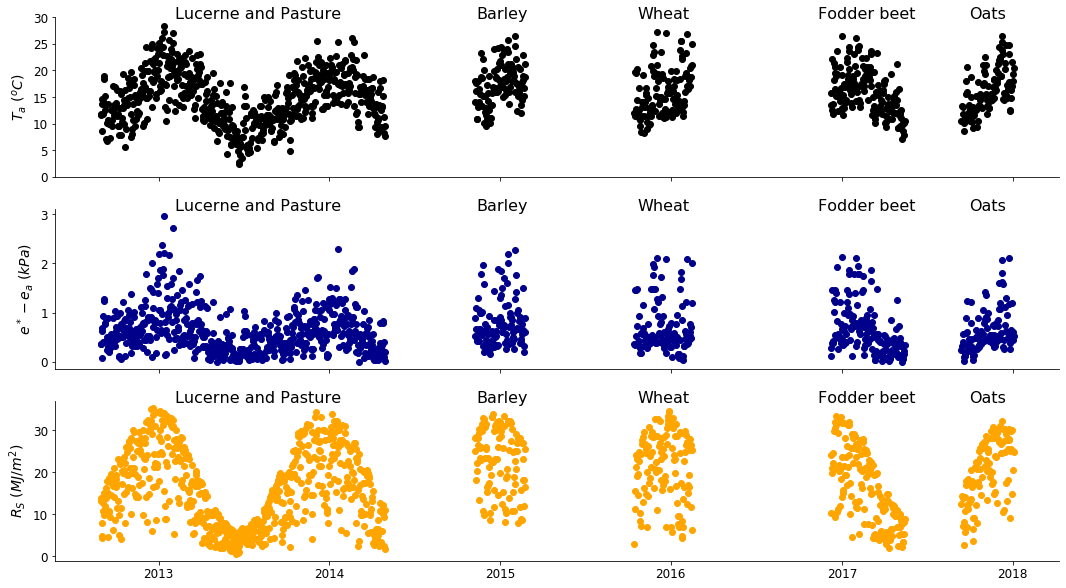

In [16]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(3,1,1)
plt.plot(Ta.loc[CommonDates,:],'o',color='k')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False,labelsize=10)
plt.ylim(0,30)
plt.ylabel('$T_a\ (^oC)$',fontsize=14)
plt.text(0.12,0.99,'Lucerne and Pasture',transform = ax.transAxes,fontsize=16)
plt.text(0.42,0.99,'Barley',transform = ax.transAxes,fontsize=16)
plt.text(0.58,0.99,'Wheat',transform = ax.transAxes,fontsize=16)
plt.text(0.76,0.99,'Fodder beet',transform = ax.transAxes,fontsize=16)
plt.text(0.91,0.99,'Oats',transform = ax.transAxes,fontsize=16)
plt.tick_params(labelsize=12)
ax = Graph.add_subplot(3,1,2)
plt.plot(Ed.loc[CommonDates,:],'o',color='darkblue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False,labelsize=10)
plt.ylabel('$e^*-e_a\ (kPa)$',fontsize=14)
plt.tick_params(labelsize=12)
plt.text(0.12,0.99,'Lucerne and Pasture',transform = ax.transAxes,fontsize=16)
plt.text(0.42,0.99,'Barley',transform = ax.transAxes,fontsize=16)
plt.text(0.58,0.99,'Wheat',transform = ax.transAxes,fontsize=16)
plt.text(0.76,0.99,'Fodder beet',transform = ax.transAxes,fontsize=16)
plt.text(0.91,0.99,'Oats',transform = ax.transAxes,fontsize=16)
ax = Graph.add_subplot(3,1,3)
plt.plot(Rs.loc[CommonDates,:],'o',color='orange')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('$R_S\ (MJ/m^2)$',fontsize=14)
#Graph.savefig('MetData.jpg',dpi=400)
plt.tick_params(labelsize=12)
plt.text(0.12,0.99,'Lucerne and Pasture',transform = ax.transAxes,fontsize=16)
plt.text(0.42,0.99,'Barley',transform = ax.transAxes,fontsize=16)
plt.text(0.58,0.99,'Wheat',transform = ax.transAxes,fontsize=16)
plt.text(0.76,0.99,'Fodder beet',transform = ax.transAxes,fontsize=16)
plt.text(0.91,0.99,'Oats',transform = ax.transAxes,fontsize=16)

Graph.savefig('C:\\Users\\cflhxb\\Desktop\\MPT method test paper\\Figure1.eps',dpi=400)

In [17]:
Ts.Barley.dropna().index

DatetimeIndex(['2014-11-04', '2014-11-05', '2014-11-06', '2014-11-07',
               '2014-11-08', '2014-11-09', '2014-11-10', '2014-11-11',
               '2014-11-12', '2014-11-13', '2014-11-14', '2014-11-15',
               '2014-11-16', '2014-11-17', '2014-11-18', '2014-11-19',
               '2014-11-20', '2014-11-21', '2014-11-22', '2014-11-23',
               '2014-11-24', '2014-11-25', '2014-11-26', '2014-11-27',
               '2014-11-28', '2014-11-29', '2014-11-30', '2014-12-01',
               '2014-12-02', '2014-12-03', '2014-12-04', '2014-12-05',
               '2014-12-06', '2014-12-07', '2014-12-08', '2014-12-09',
               '2014-12-10', '2014-12-11', '2014-12-12', '2014-12-13',
               '2014-12-14', '2014-12-15', '2014-12-16', '2014-12-17',
               '2014-12-18', '2014-12-19', '2014-12-20', '2014-12-21',
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
      

In [18]:
def MakeTimeSeriesGraphs(Data,name,ymin,ymax):
    Graph = plt.figure(figsize=(18,30))
    Crops = Data.columns.get_level_values(0).drop_duplicates().values
    pos = 1
    for C in Crops:
        GP = globals()[C+'GPs']
        ax = Graph.add_subplot(3,2,pos)
        GH.AddIndexedPlot(Data.reindex(CommonDates).loc[:,C].dropna(how='all'),ax,GP,2)
        plt.ylabel(name, fontsize=36);
        plt.ylim(ymin,ymax)
        plt.tick_params(labelsize=20)
        plt.title(C, fontsize=28)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=int(np.ceil(Data.loc[:,C].dropna(how='all').index.size/30/5))))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
        GH.AddLegend(1,16,'')
        pos+=1
def MakeSingleCropTimeSeries(Data,Crop):
    graph = plt.figure(figsize=(18,18))
    ax = graph.add_subplot(1,1,1)
    GP = globals()[Crop+'GPs']
    GH.AddIndexedPlot(Data.reindex(CommonDates).loc[:,Crop].dropna(how='all'),ax,GP,2)

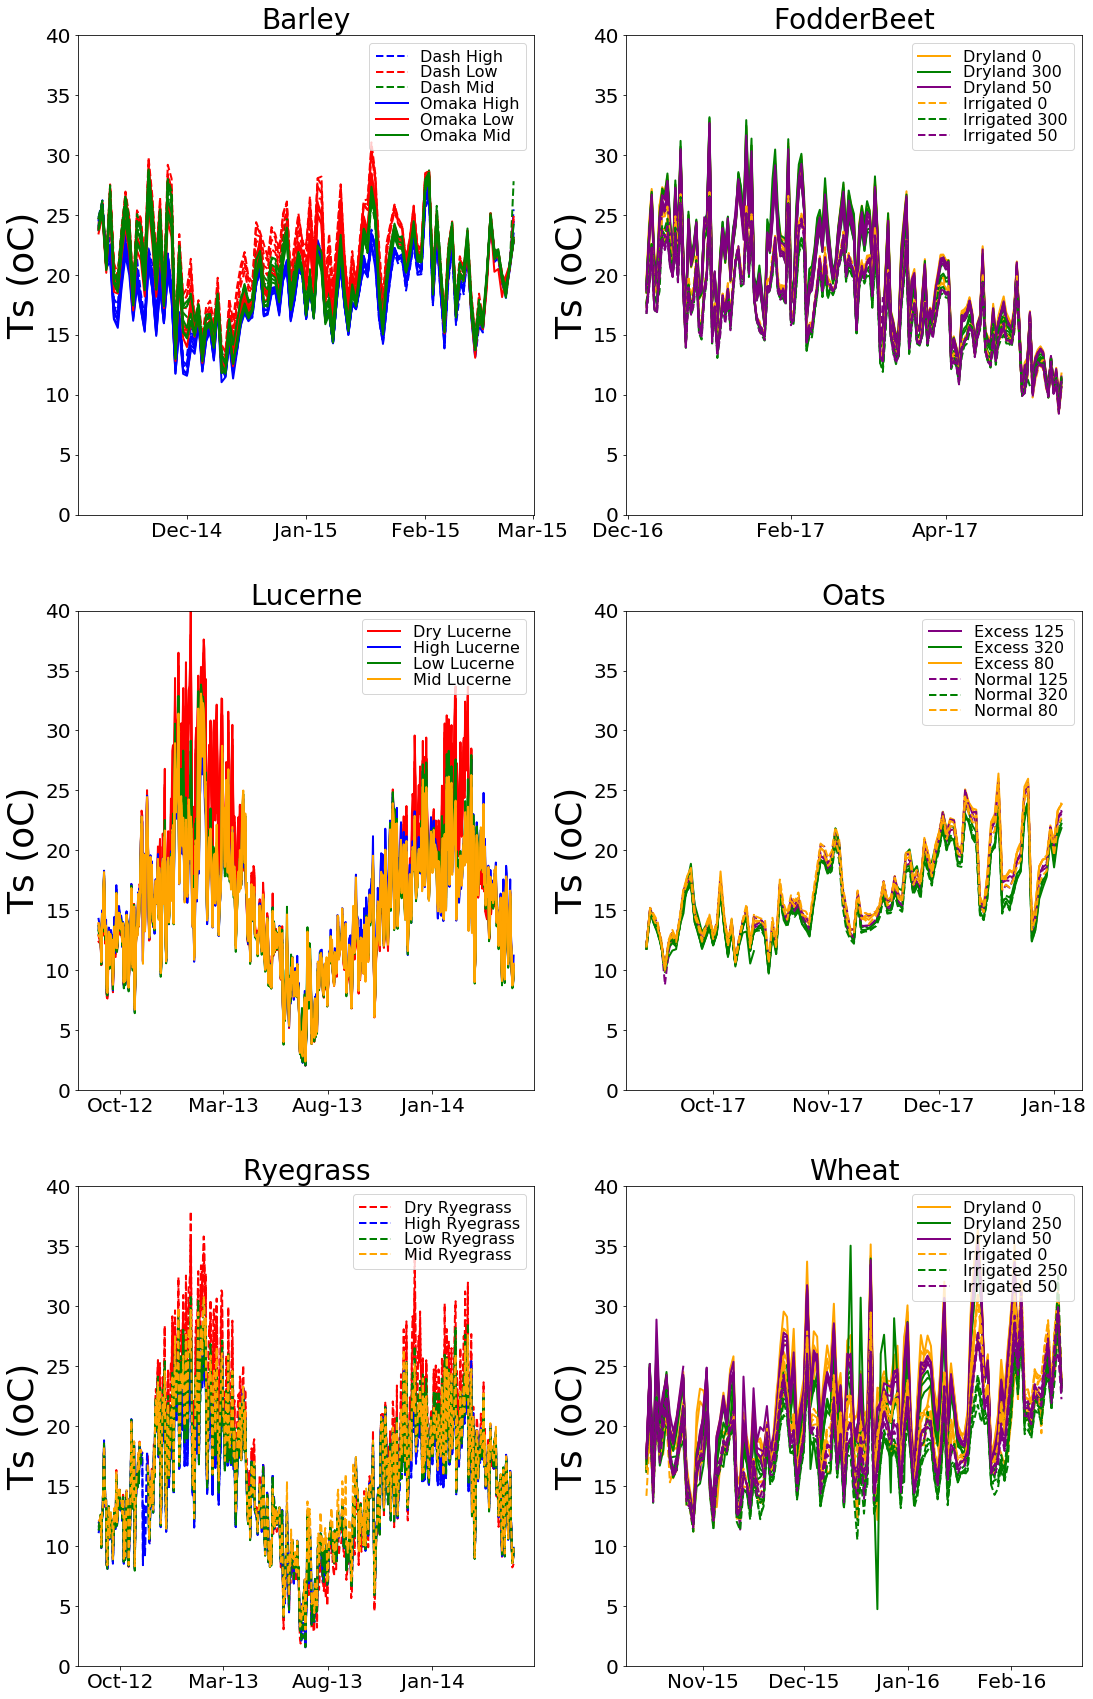

In [19]:
MakeTimeSeriesGraphs(Ts,'Ts (oC)',0,40)

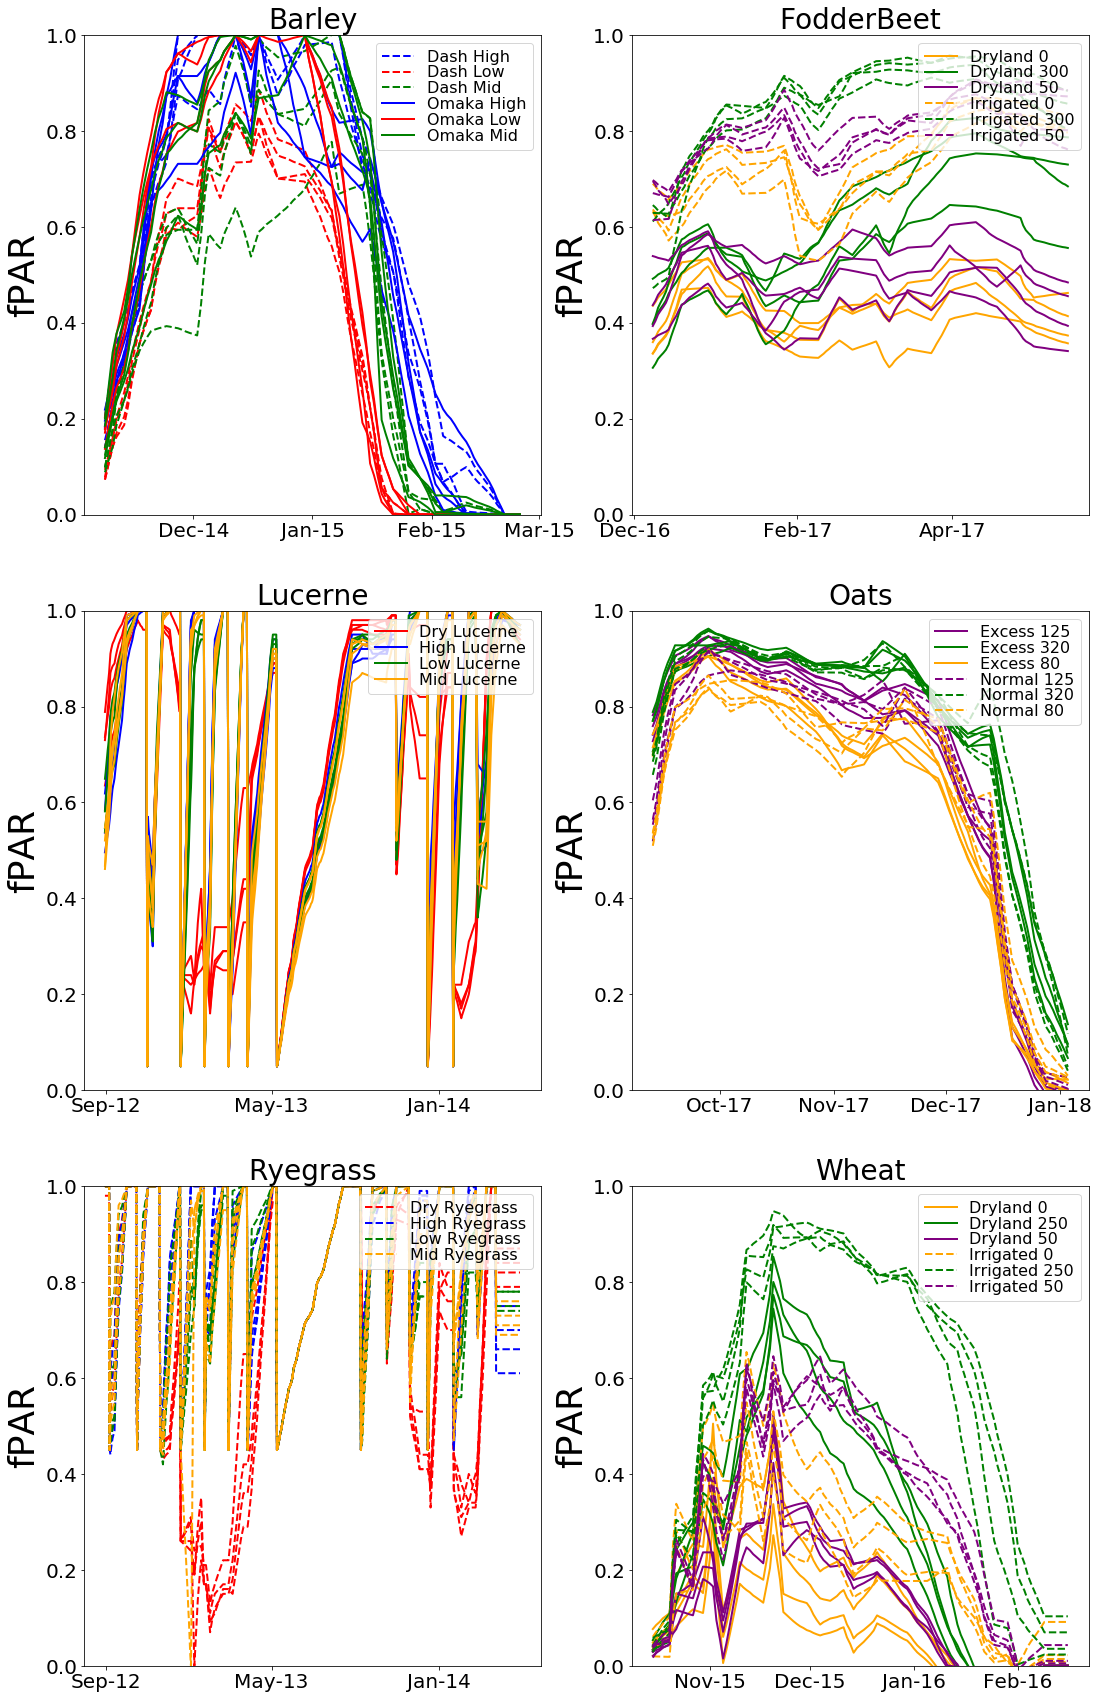

In [20]:
MakeTimeSeriesGraphs(fPAR,'fPAR',0,1)

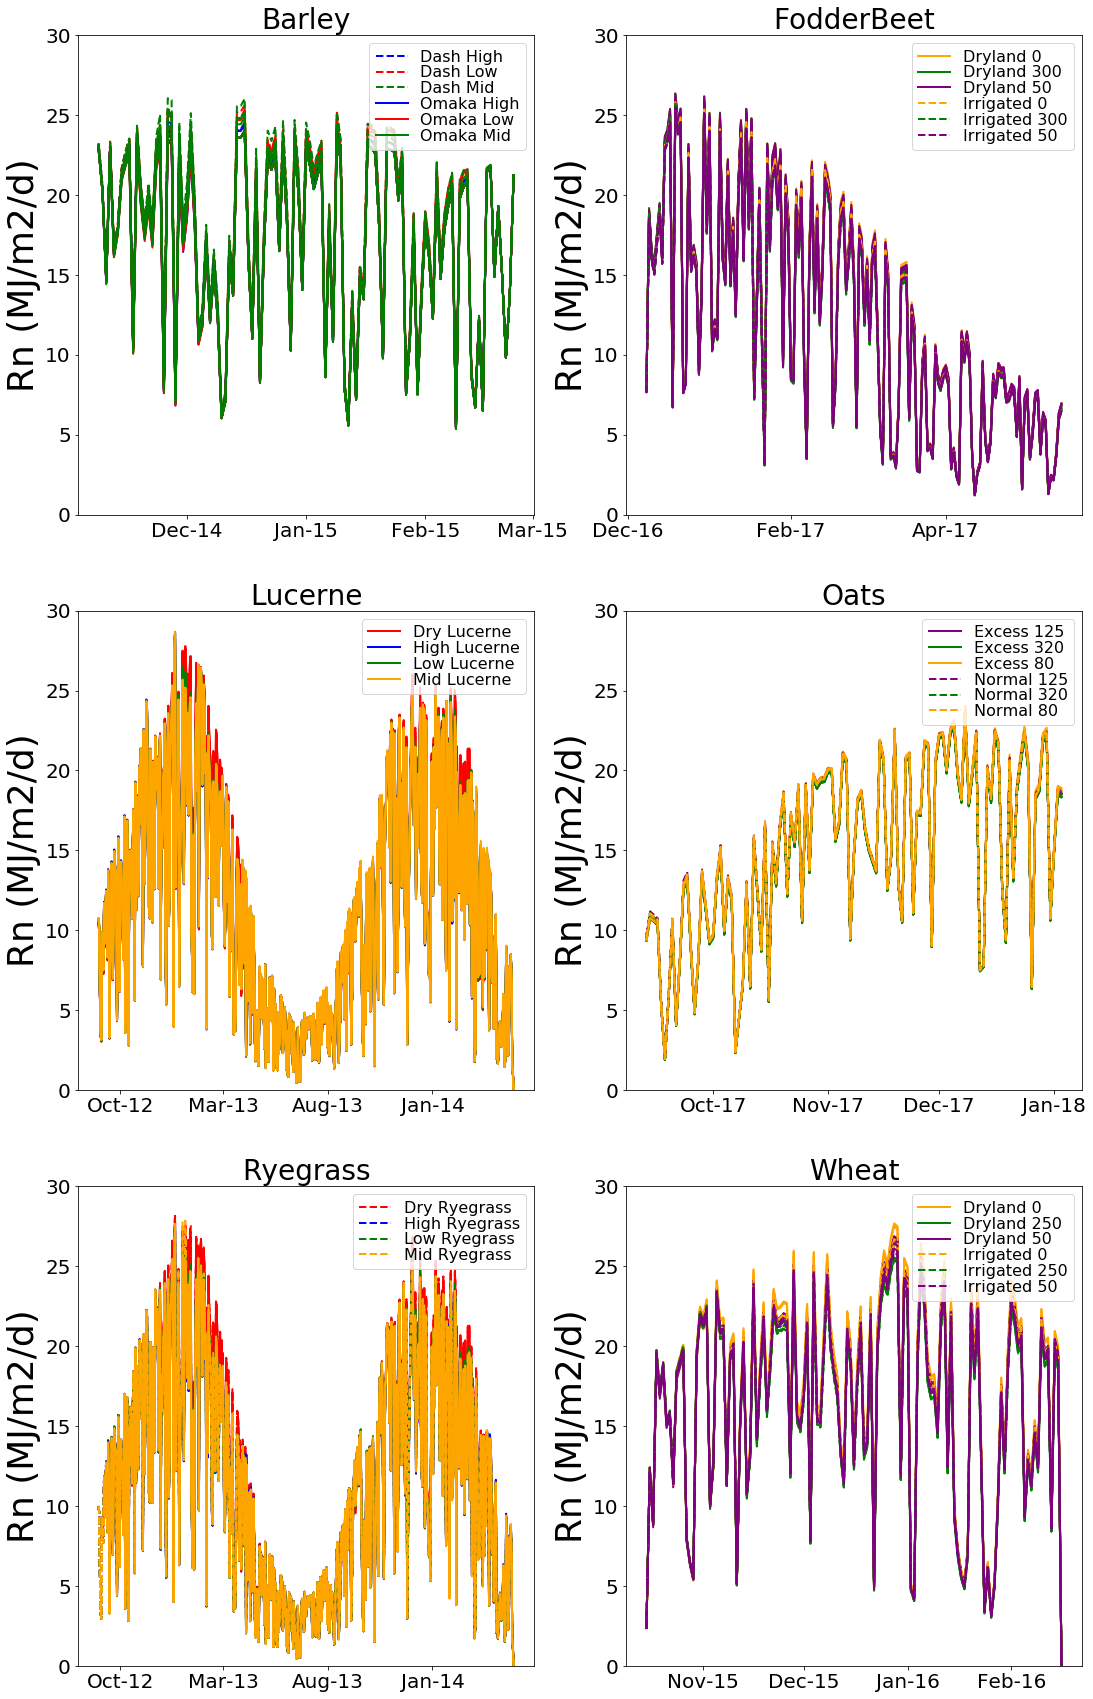

In [21]:
MakeTimeSeriesGraphs(Rn,'Rn (MJ/m2/d)',0,30)

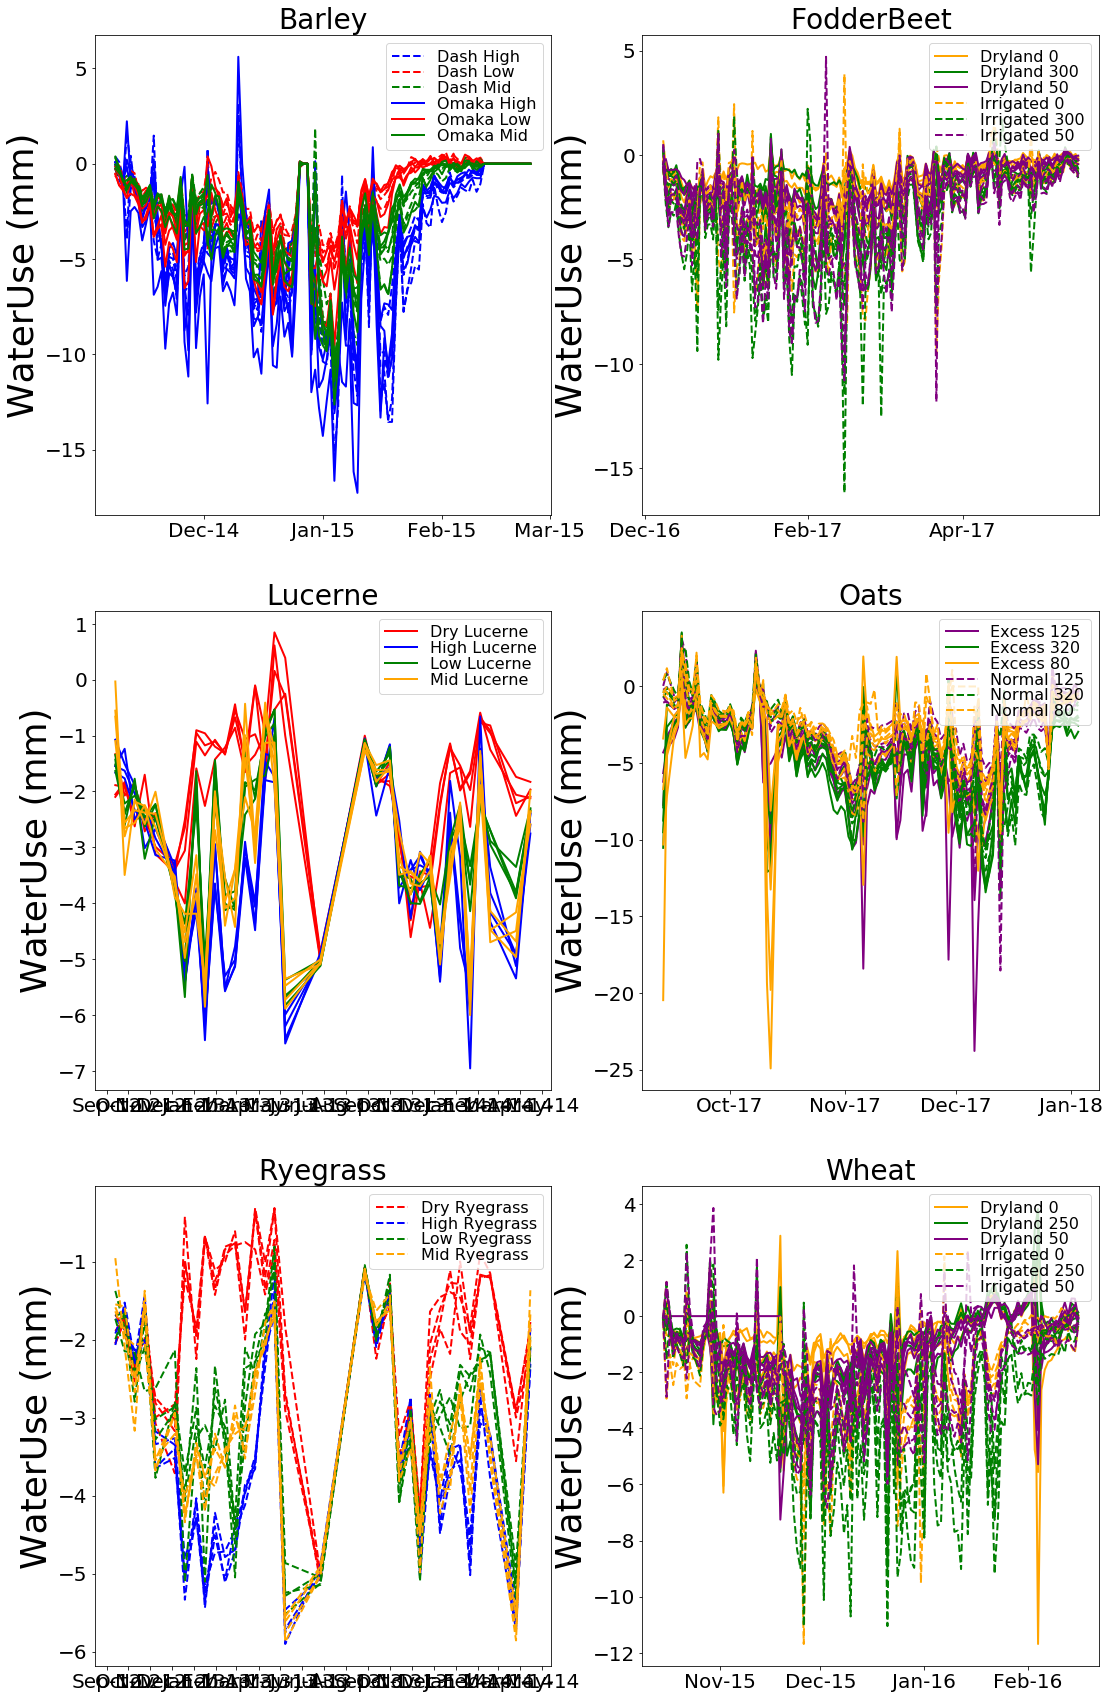

In [22]:
MakeTimeSeriesGraphs(WU,'WaterUse (mm)',None,None)

In [23]:
#Calculate aerodynamic temperature
To = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in To.columns:
    To.loc[:,plot] = Ts.loc[CommonDates,plot] + Ed.loc[CommonDates,('Expt','Expt','Expt')].values
    
#Calculate temperature difference
Td = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in Td.columns:
    Td.loc[:,plot] = To.loc[CommonDates,plot] - Ta.loc[CommonDates,('Expt','Expt','Expt')].values
    
#Calculate alpha
def AlphaCoeff(Td,fPAR):
    CoverFact = 0.1+1.6*fPAR
    if CoverFact > 1.0:
        CoverFact = 1.0
    return 1.3 + np.exp(Td * -0.13)
    #return 1/(0.68 + 0.18*Td ) * CoverFact
    #return np.exp(0.2663+.1)  * np.exp(Td*-0.127) * CoverFact
    #return np.exp(0.2663)  * np.exp(Td*-0.127) * CoverFact
    #return np.exp(0.34)  * np.exp(Td*-0.14) * CoverFact

Alpha = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in Alpha.columns:
    Alpha.loc[:,plot] = [AlphaCoeff(Td.loc[x,plot],
                                   fPAR.loc[x,plot]) for x in Alpha.index]

def estGDay(SoilRadn, AirTemp):
    Const = -0.6319
    SoilRadEff = np.multiply(SoilRadn.values,0.0801)
    AirTempEff = np.multiply(AirTemp.values,0.0659)
    return Const + SoilRadEff  + AirTempEff 

#Calculate G for each plot
G = pd.DataFrame(index=CommonDates, columns=Ts.columns)
for plot in G.columns:
    G.loc[:,plot] = estGDay(Rs.loc[CommonDates,('Expt','Expt','Expt')] * (1-fPAR.loc[CommonDates,plot]),
                            Ta.loc[CommonDates,('Expt','Expt','Expt')])
RnLessG = Rn - G

#Estimate Water Use by surfaces 
E = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in E.columns:
    E.loc[:,plot] = [et.Priestly_TaylorEO(RnLessG.loc[x,plot],
                                         Ta.loc[x,('Expt','Expt','Expt')],
                                         Alpha.loc[x,plot],
                                         'net') for x in E.index]

## Remove dates where we don't want to compare to measure WU because data is missing or on days of irrigation

In [24]:
WU.index#.loc[UseDates,:]

DatetimeIndex(['2012-09-13', '2012-09-26', '2012-10-10', '2012-10-24',
               '2012-11-08', '2012-12-05', '2012-12-19', '2013-01-04',
               '2013-01-16', '2013-01-30',
               ...
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
               '2018-01-03', '2018-01-04'],
              dtype='datetime64[ns]', length=559, freq=None)

In [25]:
#Create a list of time to exclude where data was missing or irrigation was applied
BarleyNoMeasurementDates = ['2014-12-26','2014-12-27','2014-12-28']
BarleyIrrigationDates = ['2014-11-11','2014-11-18','2014-11-26','2014-12-02','2014-12-10','2014-12-16',
                    '2014-12-23','2014-12-30','2015-01-06','2015-01-13','2015-01-14']
WheatIrrigationDates = ['2015-11-26', '2016-01-21', '2016-01-07', '2015-11-12',
                         '2015-12-24', '2015-11-19', '2015-12-17', '2016-02-04',
                         '2015-11-06', '2015-12-31', '2015-10-13', '2015-11-02',
                         '2016-01-14', '2015-10-29', '2015-12-03', '2015-10-30',
                         '2015-12-10', '2016-02-03']
FodderBeetIrrigationDates = ['2017-01-18',
                             '2017-03-08', '2017-03-01', '2017-05-30', '2017-01-25',
                             '2016-11-23', '2016-12-07', '2017-05-26', '2017-05-25',
                             '2017-02-01', '2017-02-08', '2017-03-22', '2017-02-22',
                             '2016-12-29', '2017-04-27', '2017-01-04', '2016-11-16',
                             '2017-04-12', '2017-02-15', '2017-05-29', '2017-01-11',
                             '2016-12-21']
OatsIrrigationDates = ['2017-12-06', '2017-12-13', '2017-09-13', '2017-11-22',
                        '2017-10-11', '2017-09-12', '2017-09-11', '2017-10-10',
                        '2017-10-12', '2017-08-28', '2017-11-06', '2017-11-29',
                        '2017-11-15']
LandPExclusionDates = ['2013-05-08', '2013-06-26']
ExclusionDates = pd.to_datetime(BarleyIrrigationDates + \
                 WheatIrrigationDates + \
                 FodderBeetIrrigationDates + \
                 OatsIrrigationDates + \
                 BarleyNoMeasurementDates + \
                 LandPExclusionDates)

UseDates = [x not in ExclusionDates for x in E.index]
E = E.loc[UseDates,:]

WUUseDates = [x not in ExclusionDates for x in WU.index]
WU = WU.loc[WUUseDates,:]

In [26]:
sum([x in ExclusionDates for x in E.index])


0

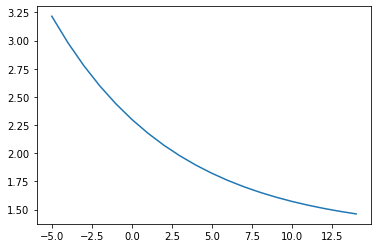

In [27]:
temprange = range(-5,15)
alphas = [AlphaCoeff(x,1.0) for x in temprange]
plt.plot(temprange,alphas)

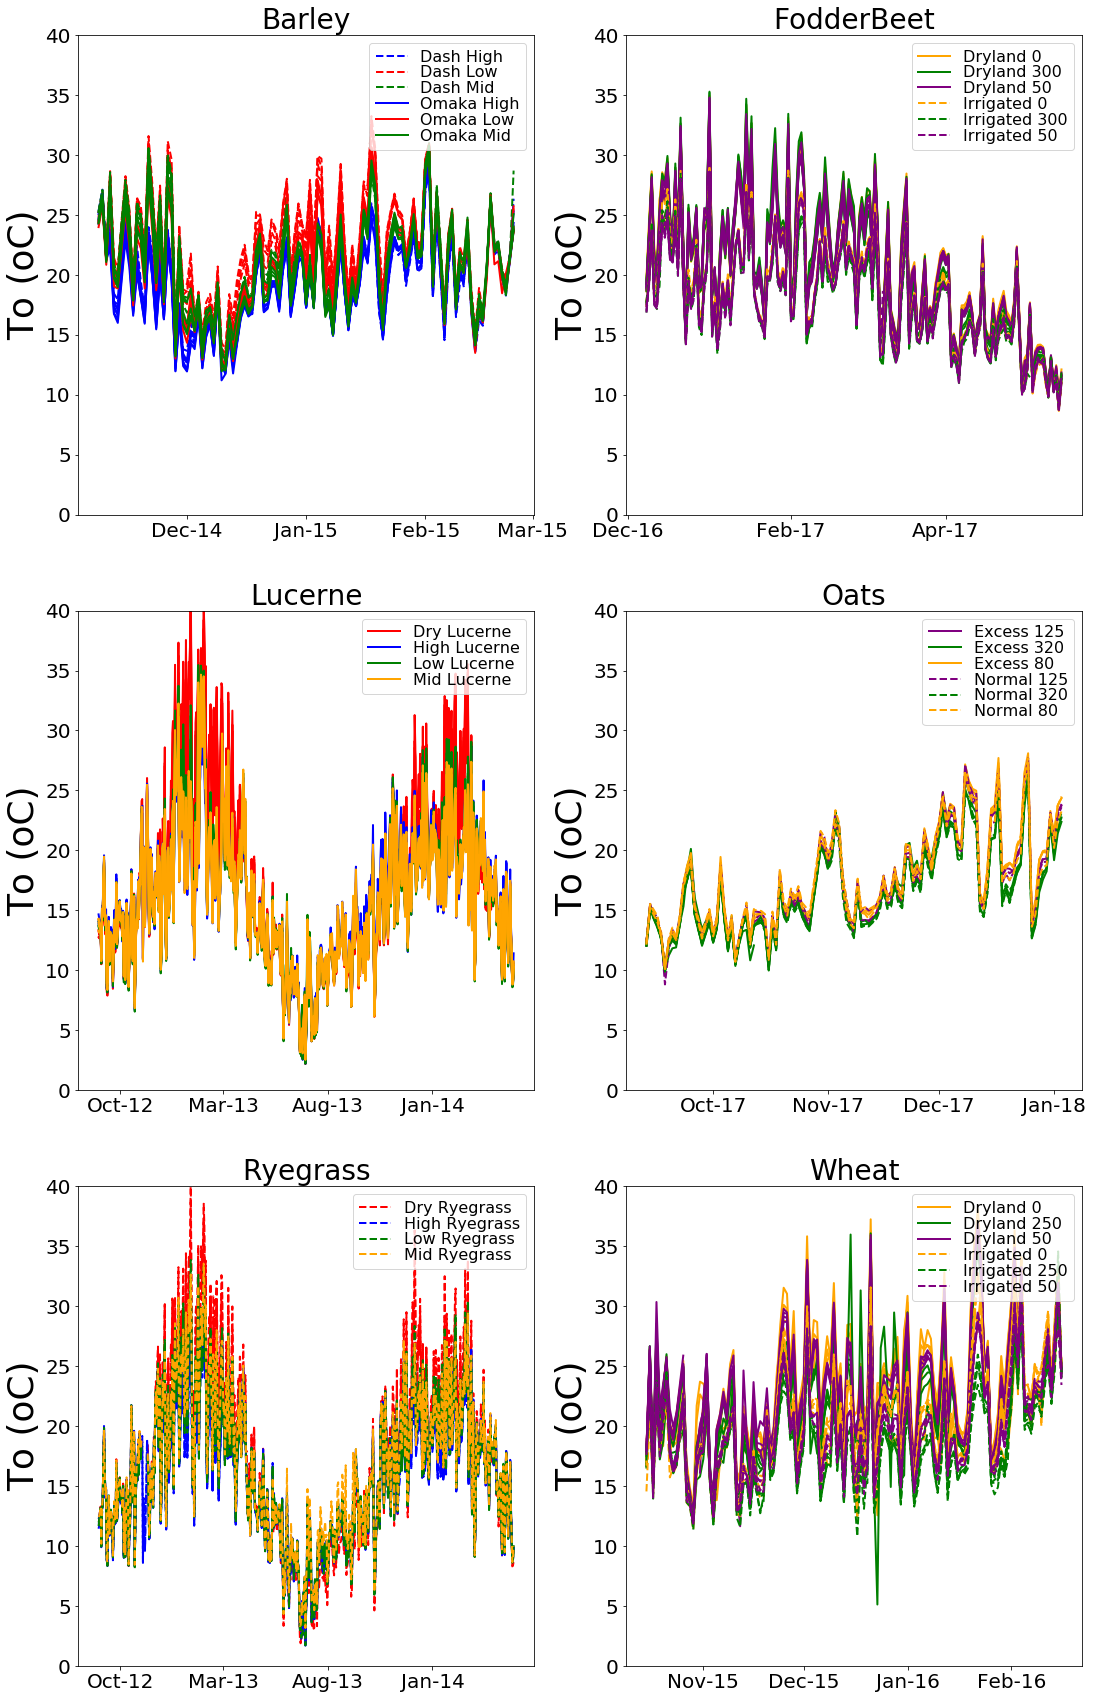

In [28]:
MakeTimeSeriesGraphs(To,'To (oC)',0,40)

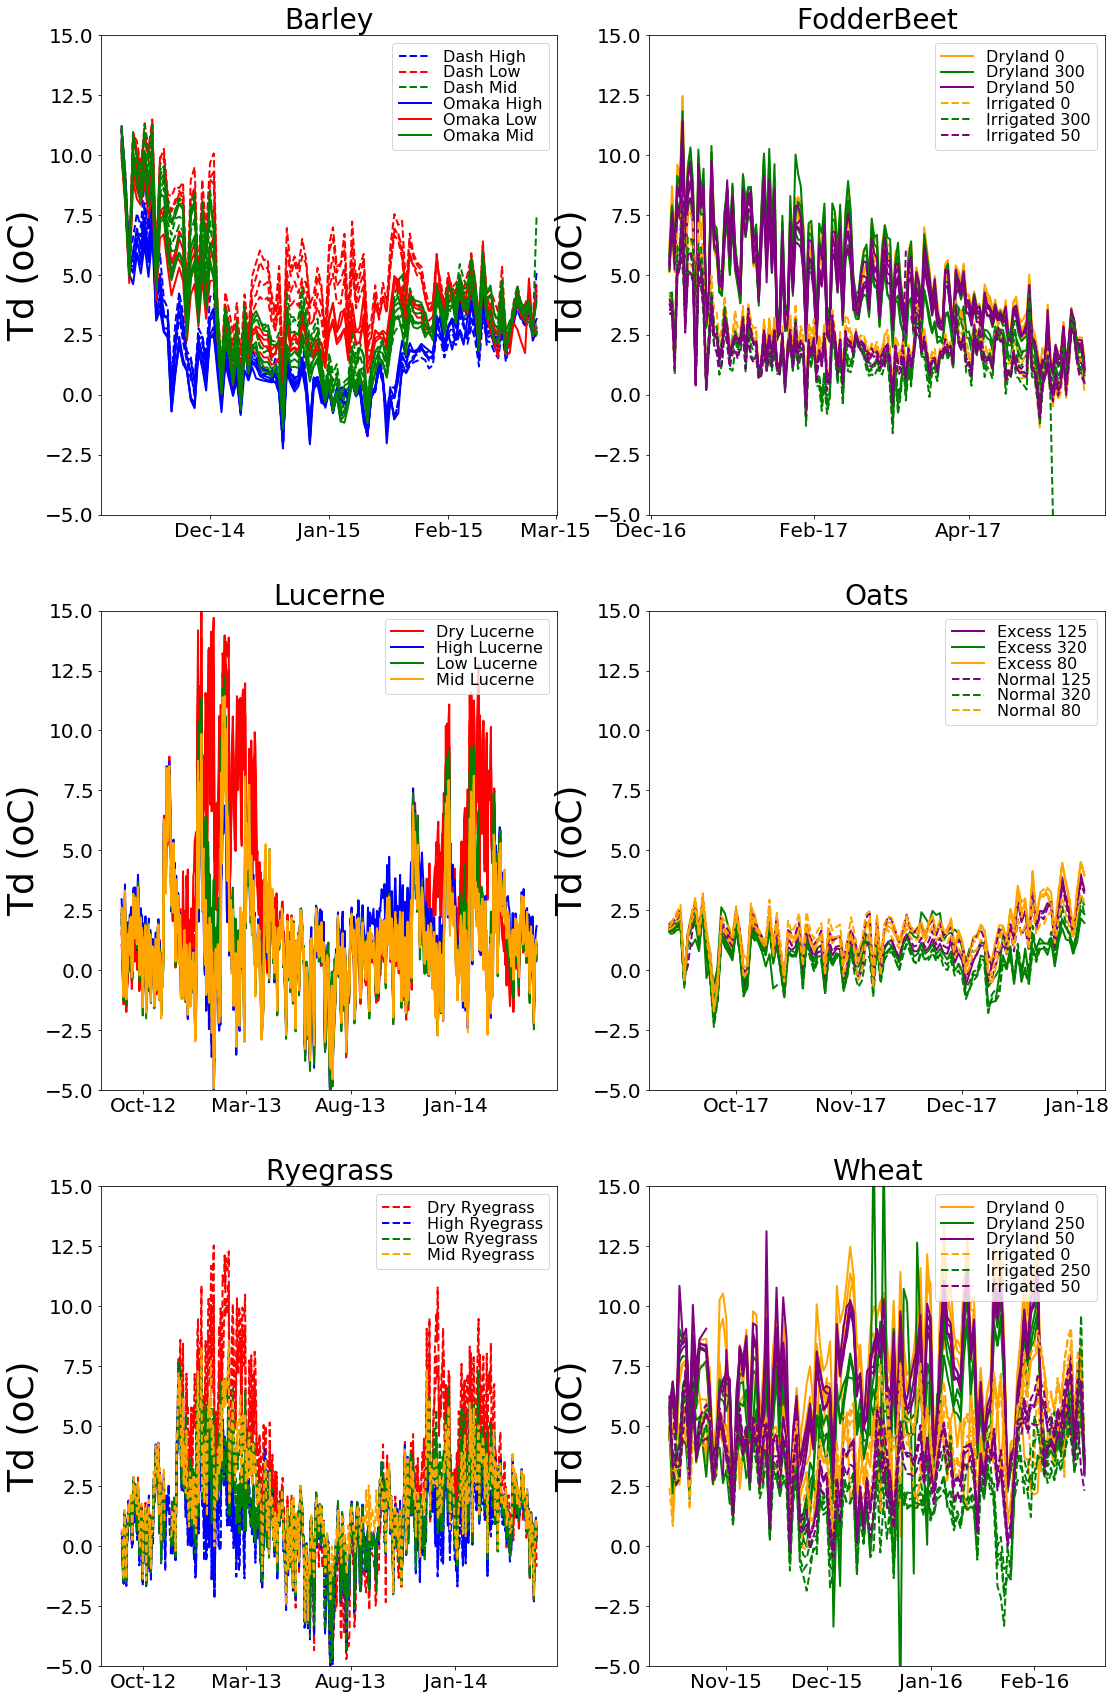

In [29]:
MakeTimeSeriesGraphs(Td,'Td (oC)',-5,15)

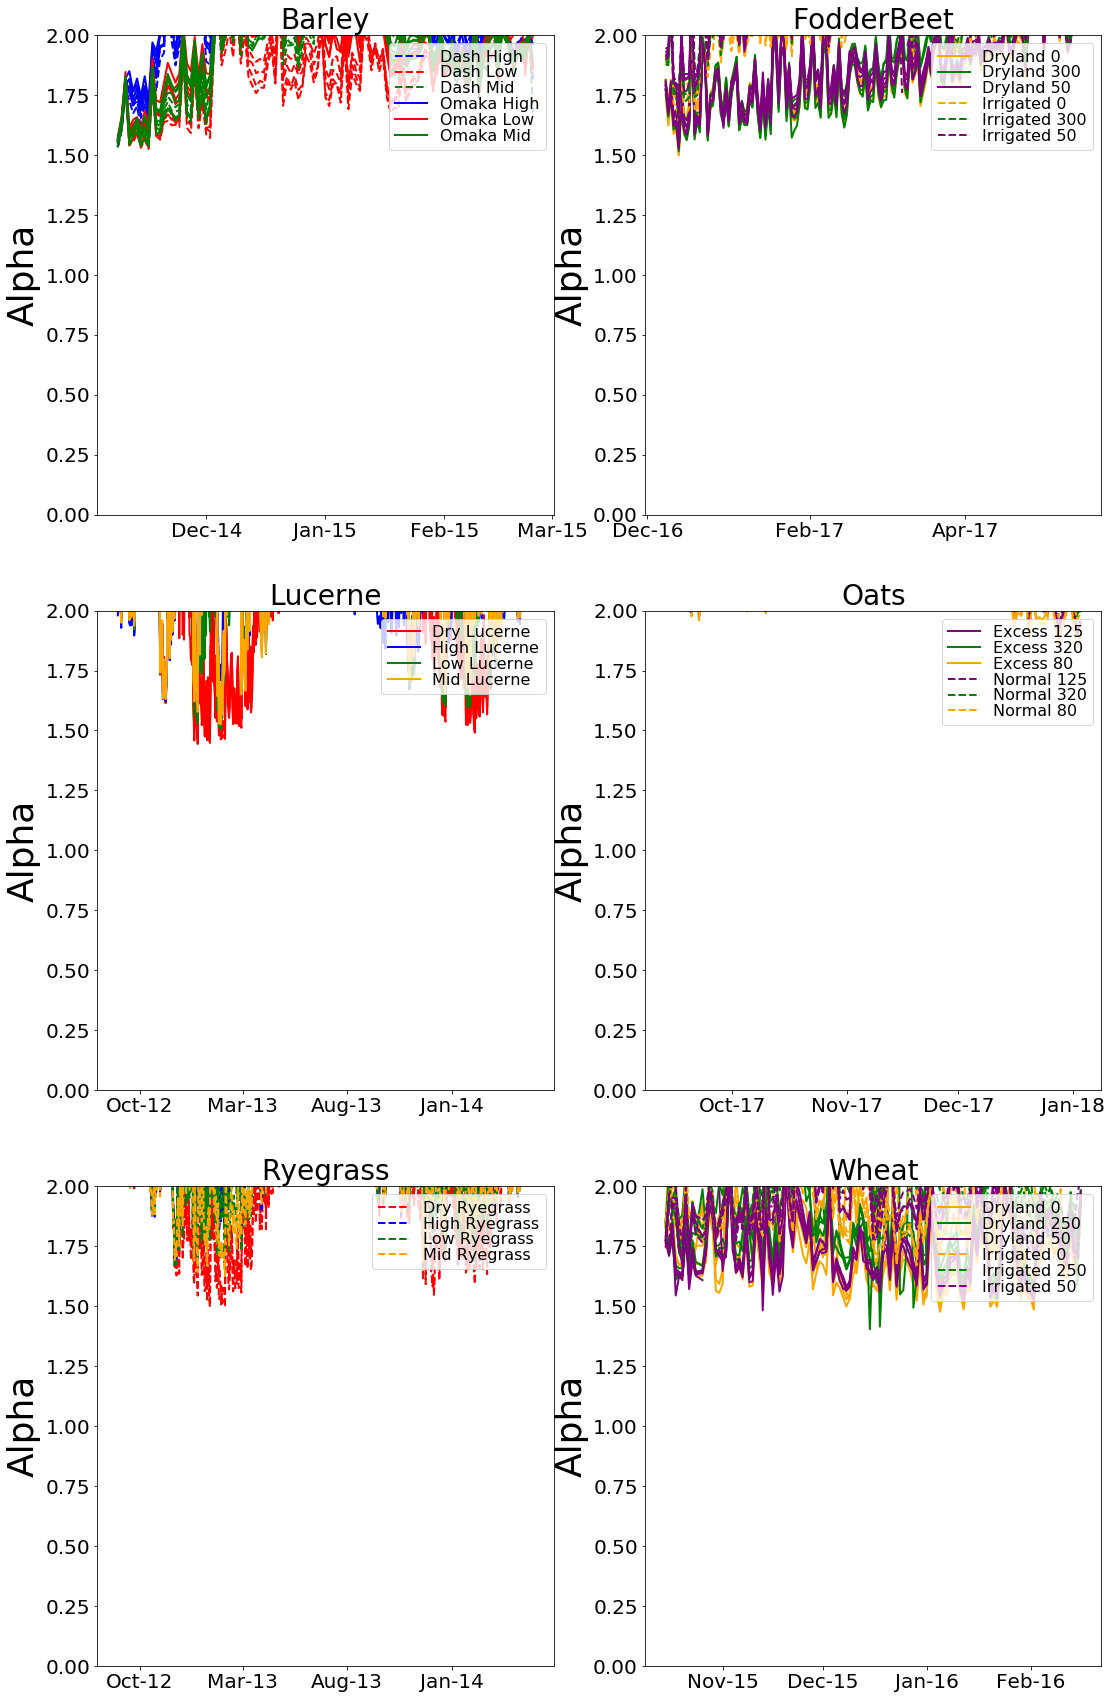

In [30]:
MakeTimeSeriesGraphs(Alpha,'Alpha',0,2)

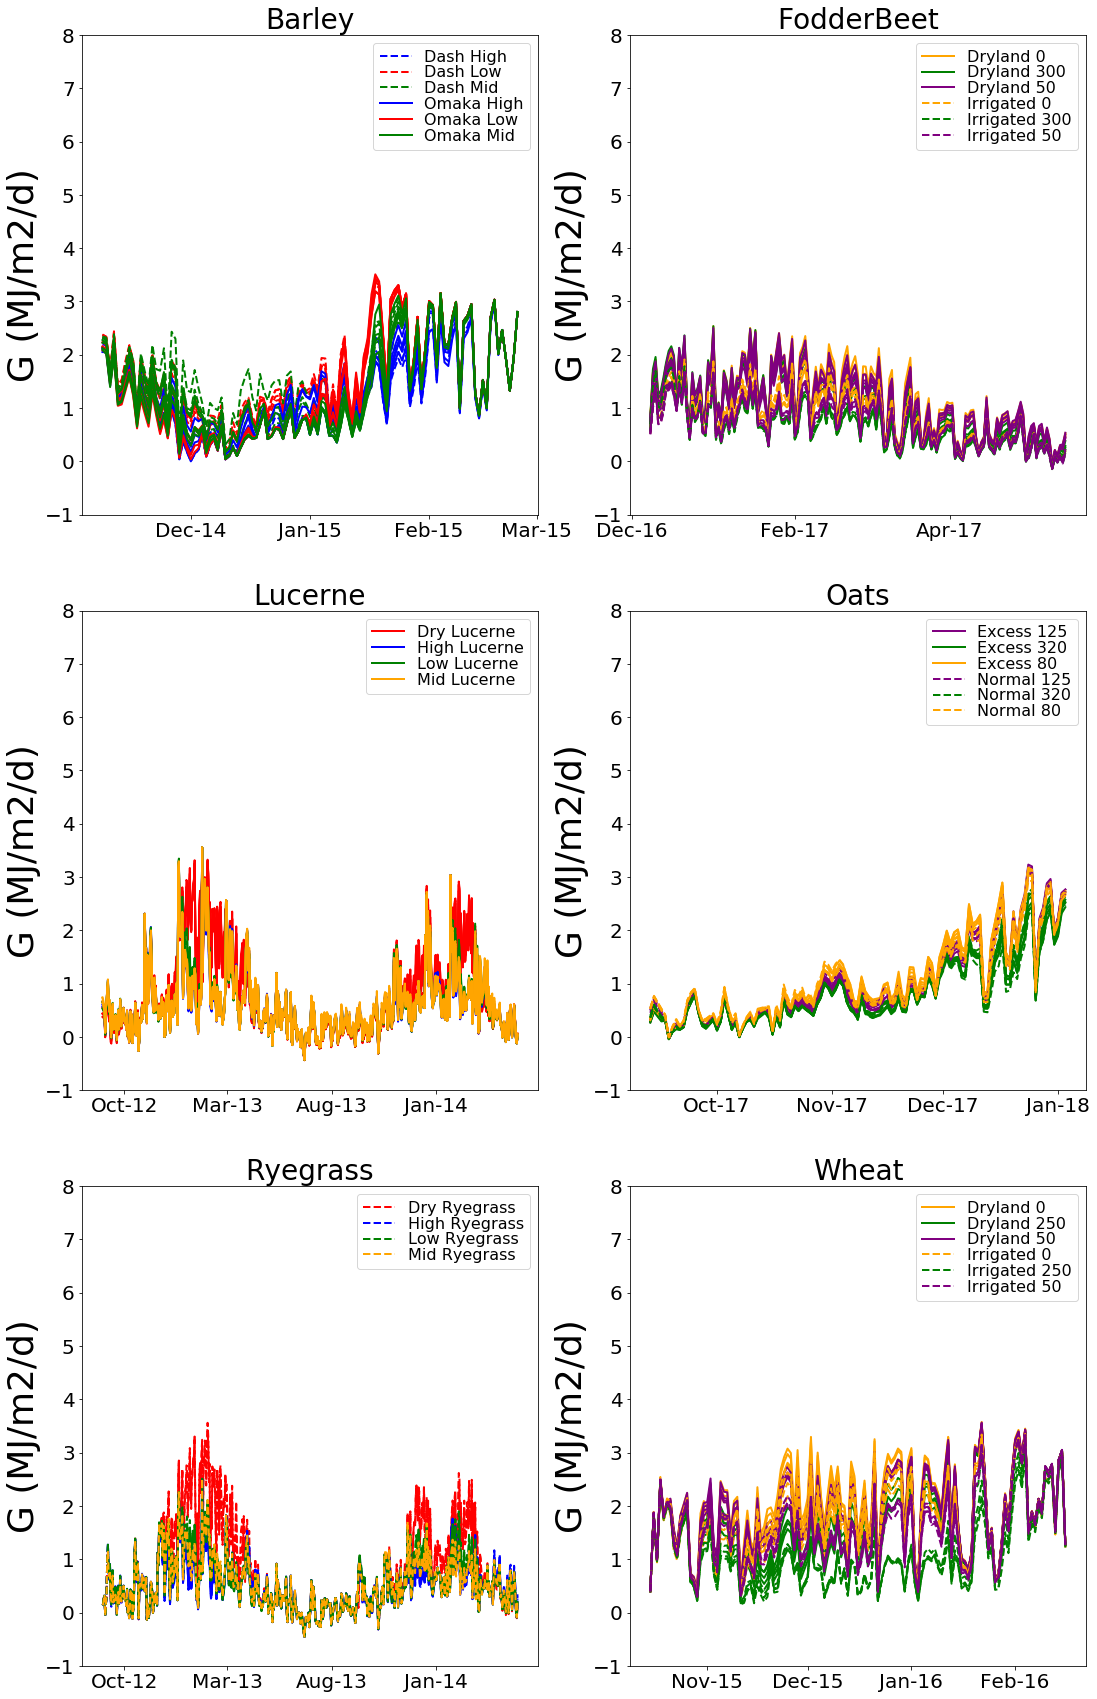

In [31]:
MakeTimeSeriesGraphs(G,'G (MJ/m2/d)',-1,8)

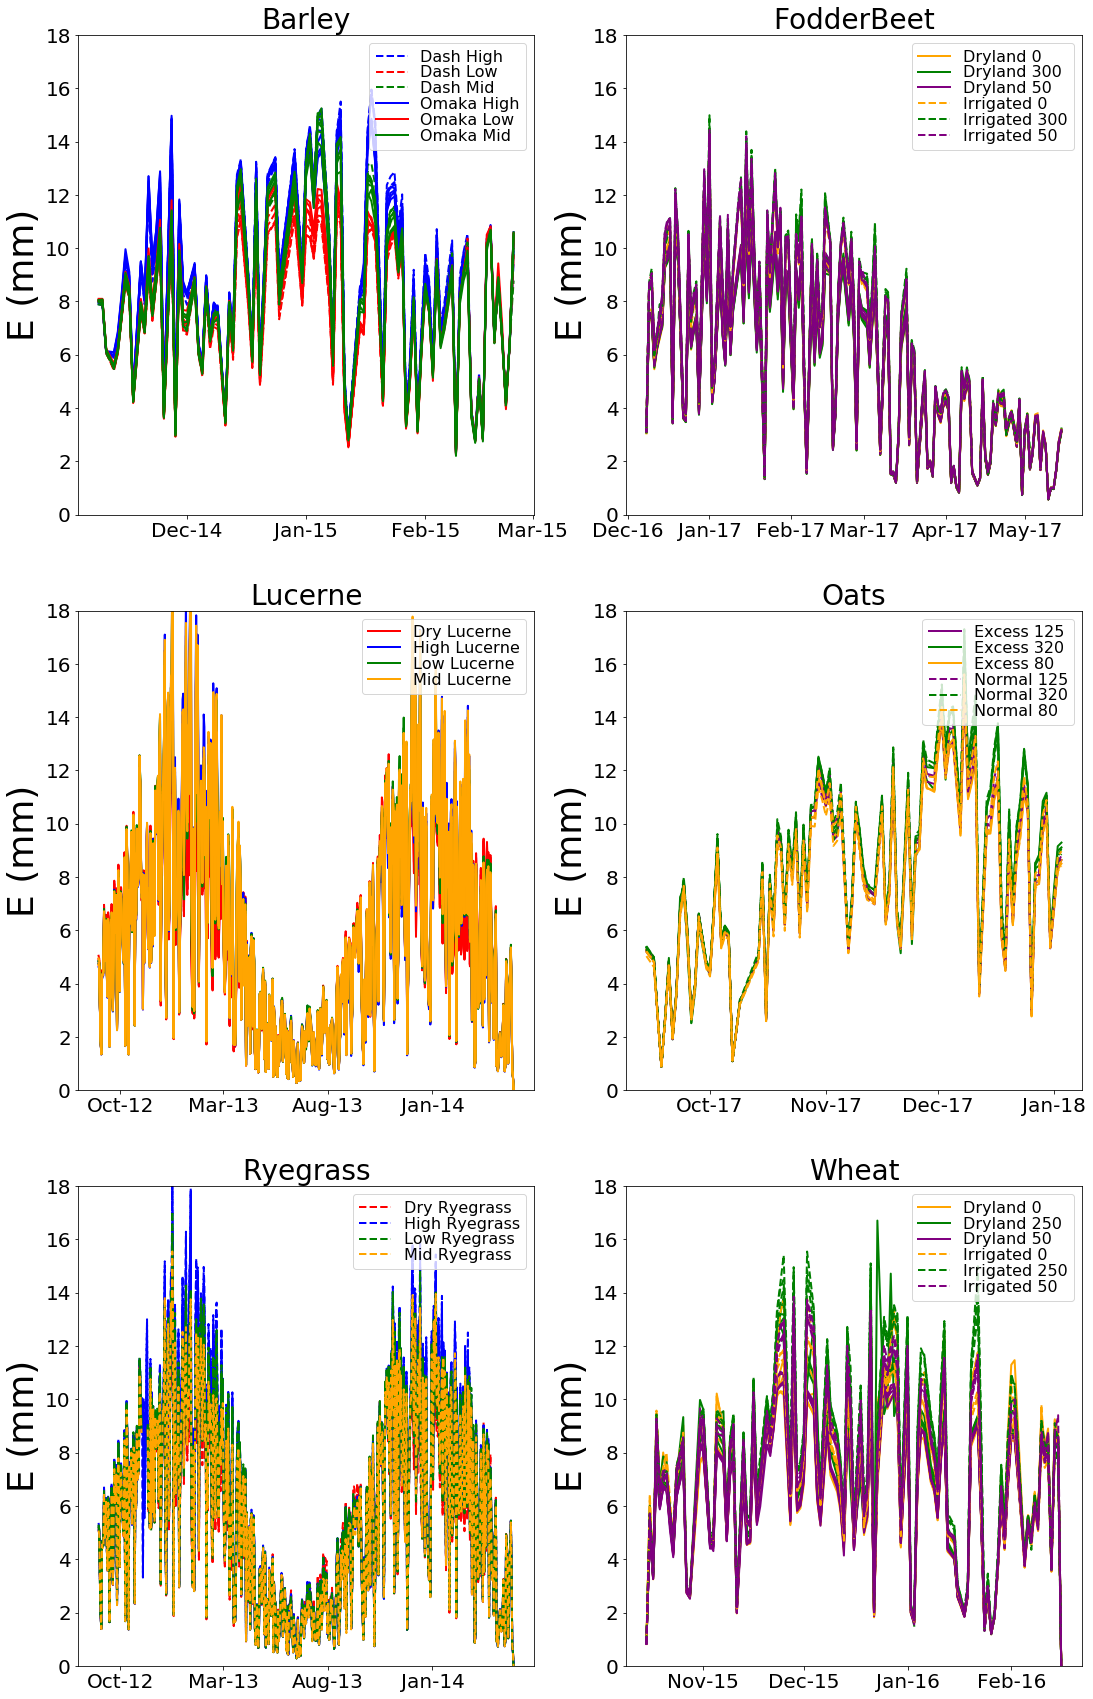

In [32]:
MakeTimeSeriesGraphs(E,'E (mm)',0,18)

## Agregate daily E estimates up to the same period as WU measurements

In [33]:
MeanPeriodE = WU.copy()
MeanPeriodE.loc[:,:] = np.nan
GH.SortFrame(MeanPeriodE)
GH.SortFrame(E)
for c in Crops:
    Dates = WU.index
    for d in range(1,len(Dates)):
        for plot in MeanPeriodE.loc[:,c].columns:
            MeanPeriodE.loc[Dates[d],(c,plot)] = E.loc[Dates[d-1]+datetime.timedelta(days=1):Dates[d],(c,plot)].mean()        

KeyError: ('Dash', 'High', '1')

In [ ]:
Graph = plt.figure(figsize=(18,20))
pos =  1
for crop in Crops:
        ax = Graph.add_subplot(3,2,pos)
        GH.AddIndexedXY(MeanPeriodE.loc[:,crop],
                        -WU.reindex(MeanPeriodE.index).loc[:,crop],
                        ax,globals()[crop+'GPs'], 10)
        GH.SetAxProps(crop,30,'Water Balance, (mm/d)','Remote (mm/d)',26,25)
        GH.AddLegend(2,16,"")
        Y = MeanPeriodE.loc[:,crop].stack().stack().stack()
        X = -1 * WU.loc[:,crop].stack().stack().stack().reindex(Y.index)
        RegStats = MUte.MathUtilities.CalcRegressionStats('ET',Y,X)
        Xs = []
        Xs.append(X.min())
        Xs.append(X.max())
        Ys = []
        Ys.append(RegStats.Intercept + Xs[0]*RegStats.Slope)
        Ys.append(RegStats.Intercept + Xs[1]*RegStats.Slope)
        plt.plot([0,13],[0,13],'-', linewidth = 3, color='k')
        fitR2 = r'$R^2$ = ' + str(RegStats.R2)[:4]\
            + '\n$Bias$ = ' + str(RegStats.ME)[:4] + ' mm' \
            + '\n$RMSE$ = ' + str(RegStats.RMSE)[:4] + ' mm'\
            + '\n$NSE$ = ' + str(RegStats.NSE)[:4] +''
        plt.text(.7,.05,fitR2,fontsize=16,transform=ax.transAxes)
        pos +=1
plt.tight_layout()    

In [ ]:
Graph = plt.figure(figsize=(18,20))
pos =  1
for crop in Crops:
        ax = Graph.add_subplot(3,2,pos)
        F1 = WU.loc[:,crop].columns.get_level_values(0).name
        F2 = WU.loc[:,crop].columns.get_level_values(1).name
        GH.AddIndexedXY(MeanPeriodE.loc[:,crop].groupby(level=[F1,F2],axis=1).mean(),
                        -WU.reindex(MeanPeriodE.index).loc[:,crop].groupby(level=[F1,F2],axis=1).mean(),
                        ax,globals()[crop+'GPs'], 10)
        GH.SetAxProps(crop,25,'Water Balance, (mm/d)','Remote (mm/d)',26,25)
        GH.AddLegend(2,16,"")
        Y = MeanPeriodE.loc[:,crop].groupby(level=[F1,F2],axis=1).mean().stack().stack()
        X = -1 * WU.loc[:,crop].groupby(level=[F1,F2],axis=1).mean().stack().stack().reindex(Y.index)
        RegStats = MUte.MathUtilities.CalcRegressionStats('ET',Y,X)
        Xs = []
        Xs.append(X.min())
        Xs.append(X.max())
        Ys = []
        Ys.append(RegStats.Intercept + Xs[0]*RegStats.Slope)
        Ys.append(RegStats.Intercept + Xs[1]*RegStats.Slope)
        plt.plot([0,13],[0,13],'-', linewidth = 3, color='k')
        fitR2 = r'$R^2$ = ' + str(RegStats.R2)[:4]\
            + '\n$Bias$ = ' + str(RegStats.ME)[:4] + ' mm' \
            + '\n$RMSE$ = ' + str(RegStats.RMSE)[:4] + ' mm'\
            + '\n$NSE$ = ' + str(RegStats.NSE)[:4] +''
        plt.text(.7,.05,fitR2,fontsize=16,transform=ax.transAxes)
        
        pos +=1
plt.tight_layout()    

In [ ]:
Graph = plt.figure(figsize=(18,14))
pos =  1
for crop in Crops:
        ax = Graph.add_subplot(2,3,pos)
        F1 = WU.loc[:,crop].columns.get_level_values(0).name
        F2 = WU.loc[:,crop].columns.get_level_values(1).name
        GH.AddIndexedXY(MeanPeriodE.loc[:,crop].groupby(level=[F1,F2],axis=1).mean(),
                        -WU.reindex(MeanPeriodE.index).loc[:,crop].groupby(level=[F1,F2],axis=1).mean(),
                        ax,globals()[crop+'GPs'], 10)
        GH.SetAxProps(crop,25,'Water Balance, (mm/d)','Remote (mm/d)',26,25)
        GH.AddLegend(2,16,"")
        Y = MeanPeriodE.loc[:,crop].groupby(level=[F1,F2],axis=1).mean().stack().stack()
        X = -1 * WU.loc[:,crop].groupby(level=[F1,F2],axis=1).mean().stack().stack().reindex(Y.index)
        RegStats = MUte.MathUtilities.CalcRegressionStats('ET',Y,X)
        Xs = []
        Xs.append(X.min())
        Xs.append(X.max())
        Ys = []
        Ys.append(RegStats.Intercept + Xs[0]*RegStats.Slope)
        Ys.append(RegStats.Intercept + Xs[1]*RegStats.Slope)
        plt.plot([0,13],[0,13],'-', linewidth = 3, color='k')
        fitR2 = r'$R^2$ = ' + str(RegStats.R2)[:4]\
            + '\n$Bias$ = ' + str(RegStats.ME)[:4] + ' mm' \
            + '\n$RMSE$ = ' + str(RegStats.RMSE)[:4] + ' mm'\
            + '\n$NSE$ = ' + str(RegStats.NSE)[:4] +''
        plt.text(.7,.05,fitR2,fontsize=16,transform=ax.transAxes)
        
        pos +=1
plt.tight_layout()    

In [ ]:
Graph = plt.figure(figsize=(18,20))
pos =  1
for crop in Crops:
        ax = Graph.add_subplot(3,2,pos)
        F1 = WU.loc[:,crop].columns.get_level_values(0).name
        F2 = WU.loc[:,crop].columns.get_level_values(1).name
        WaterUse = -WU.reindex(MeanPeriodE.index).loc[:,crop].groupby(level=[F1,F2],axis=1).mean()
        GH.AddIndexedXY(MeanPeriodE.loc[:,crop].groupby(level=[F1,F2],axis=1).mean().cumsum(),
                        WaterUse.cumsum(),
                        ax,globals()[crop+'GPs'], 10)
        ymax = max(MeanPeriodE.loc[:,crop].cumsum().max().max(),
                  WaterUse.cumsum().max().max())
        plt.plot([0,ymax],[0,ymax],'k',lw=5)
        plt.ylabel('Water Balance, (mm/d)',fontsize=26)
        plt.xlabel('Remote (mm/d)',fontsize=26)
        plt.tick_params(labelsize=25)
        plt.title(crop,fontsize=30)
        #plt.ylim(-0,15)
        labels, handles = GH.DedupLegendElements()
        ledg = plt.legend(labels, handles,loc=2,numpoints=1,fontsize = 16,labelspacing = 0.05)
        ledg.get_title().set_fontsize(20)
        pos +=1
plt.tight_layout()    

## Calculate and graph residules

In [ ]:
Residules = np.divide(np.subtract(MeanPeriodE, -WU),-WU)

In [ ]:
MakeTimeSeriesGraphs(Residules,'Residules(mm)',None,None)

In [ ]:
MakeSingleCropTimeSeries(Residules.loc['2013-01-01':'2013-03-15',:],'Lucerne')

In [ ]:
MakeSingleCropTimeSeries(MeanPeriodE.loc[:'2013-07-01',:],'Ryegrass')

In [ ]:
MakeSingleCropTimeSeries(MeanPeriodE.loc[:'2013-07-01',:],'Lucerne')